In [1]:
import pandas
import numpy as np
import os
from graphviz import Digraph
from graphviz import Graph
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pydotplus 
from libpgm.pgmlearner import PGMLearner

In [2]:
adult_df=pandas.read_csv('adult.csv')

In [3]:
#preprocessing of Adult dataset
adultdf= adult_df[['age','sex', 'race', 'income', 'education.num','education', 'occupation','marital.status','workclass']][adult_df.occupation!='?'].dropna()
adultdf.dropna(inplace=True)

In [4]:
adultdf = adultdf.rename(columns = {'education.num' : 'eduNum'})
adultdf = adultdf.rename(columns = {'age' : 'Age'})
adultdf = adultdf.rename(columns = {'race' : 'Race'})
adultdf = adultdf.rename(columns = {'sex' : 'Sex'})
adultdf = adultdf.rename(columns = {'income' : 'Income'})
adultdf = adultdf.rename(columns = {'marital.status' : 'MaritalSt'})
adultdf = adultdf.rename(columns = {'occupation' : 'Department'})

In [5]:
adultdf.loc[:,'eduNum'] = pandas.cut(adultdf.eduNum, 3 , labels =[0,1,2])
adultdf.loc[:,'Age'] = pandas.cut(adultdf.Age, 4 , labels =[1,2,3,4])
adultdf.loc[:,'Income'] = adultdf.Income.map({'<=50K':0 , '>50K':1})
adultdf.loc[:,'Race'] = adultdf.Race.map({'White':0 , 'Black':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3, 'Other':4})
adultdf.loc[:,'Sex'] = adultdf.Sex.map({'Female':0 , 'Male':1})
adultdf.loc[:,'MaritalSt']  = adultdf.MaritalSt.map({'Married-civ-spouse':0 , 'Married-AF-spouse':0, 'Divorced':1,'Separated':1, 'Married-spouse-absent':1 , 'Widowed':1,'Never-married':2})
adultdf.loc[:,'Department'] = adultdf.Department.map({'Tech-support': 'IT' ,
                                                     'Craft-repair':'Production', 'Other-service':'Production', 'Handlers-cleaners':'Production', 'Priv-house-serv':'Production', 'Protective-serv':'Production', 'Transport-moving':'Production',
                                                     'Adm-clerical': 'Admin', 
                                                     'Sales':'Sales', 
                                                     'Exec-managerial':'CEO',                                                   
                                                     'Prof-specialty':'SE', 
                                                     'Machine-op-inspct':'Other' ,
                                                     'Farming-fishing':'Other',  
                                                     'Armed-Forces':'Other'})

In [6]:
adultdf.to_csv('ppost_adult.csv',columns = ['Age','Sex', 'Race', 'Income','MaritalSt', 'Department'], index=False)

In [7]:
dfadult = pandas.read_csv('ppost_adult.csv')
#dfadult

In [8]:
list_dep_ad = ['IT', 'Admin', 'Production', 'SE', 'Sales', 'Other', 'CEO']
list_gen_ad = ['0', '1']
list_sug_ad = [ ]
#list2 = [ ]
print 'Dep Sex Perc'
for dep_ad in list_dep_ad:
    for gen_ad in list_gen_ad:         
        print dep_ad, gen_ad, dfadult[(dfadult.Department.isin([dep_ad])) & (dfadult.Sex.isin([gen_ad]))].shape[0] /(1.0*dfadult[dfadult.Department.isin([dep_ad])].shape[0])

Dep Sex Perc
IT 0 0.375
IT 1 0.625
Admin 0 0.672944297082
Admin 1 0.327055702918
Production 0 0.223407115333
Production 1 0.776592884667
SE 0 0.365942028986
SE 1 0.634057971014
Sales 0 0.34602739726
Sales 1 0.65397260274
Other 0 0.20465890183
Other 1 0.79534109817
CEO 0 0.285046728972
CEO 1 0.714953271028


In [9]:
learner_adult = gum.BNLearner('ppost_adult.csv')
bn_adult = learner_adult.learnBN()
bn_adult

(gum::BayesNet<double>@000000000D4B7410) BN{nodes: 6, arcs: 9, domainSize: 1680, parameters: 110, compression ratio: 93% }

In [10]:
gnb.showInformation(bn_adult,{},size="20")

In [11]:
#delete arcs due to weak dependence 
bn_adult.eraseArc('Sex','Race')
bn_adult.eraseArc('MaritalSt','Race')
bn_adult

(gum::BayesNet<double>@000000000D4B7410) BN{nodes: 6, arcs: 7, domainSize: 1680, parameters: 85, compression ratio: 94% }

In [12]:
print ("Sex= 0, 1  ; Income = 0 (<=50K):")
print(dfadult[(dfadult.Income==0) & (dfadult.Sex==0)].shape[0] /(1.0*dfadult[dfadult.Income==0].shape[0]),
      dfadult[(dfadult.Income==0) & (dfadult.Sex==1)].shape[0]/(1.0*dfadult[dfadult.Income==0].shape[0]))
print ("sex= 0, 1  ; income = 1(>50K):")
print(dfadult[(dfadult.Income==1) & (dfadult.Sex==0)].shape[0] /(1.0*dfadult[dfadult.Income==1].shape[0]),
      dfadult[(dfadult.Income==1) & (dfadult.Sex==1)].shape[0]/(1.0*dfadult[dfadult.Income==1].shape[0]))

print ("Sex= 0  ; Income = 0, 1 :")
print(dfadult[(dfadult.Income==0) & (dfadult.Sex==0)].shape[0] /(1.0*dfadult[dfadult.Sex==0].shape[0]),
      dfadult[(dfadult.Income==1) & (dfadult.Sex==0)].shape[0]/(1.0*dfadult[dfadult.Sex==0].shape[0]))
print ("sex= 1  ; income = 0,1 :")
print(dfadult[(dfadult.Income==0) & (dfadult.Sex==1)].shape[0] /(1.0*dfadult[dfadult.Sex==1].shape[0]),
      dfadult[(dfadult.Income==1) & (dfadult.Sex==1)].shape[0]/(1.0*dfadult[dfadult.Sex==1].shape[0]))

Sex= 0, 1  ; Income = 0 (<=50K):
(0.381610889543957, 0.6183891104560431)
sex= 0, 1  ; income = 1(>50K):
(0.1473202614379085, 0.8526797385620914)
Sex= 0  ; Income = 0, 1 :
(0.8865055387713998, 0.1134944612286002)
sex= 1  ; income = 0,1 :
(0.6862131999230325, 0.31378680007696746)


In [13]:
core_df = pandas.read_csv('core.csv')
#core_df

In [14]:
#preprocessing of Core datasets
coredf=core_df[['Age','RaceDesc', 'Sex', 'MaritalDesc', 'Pay Rate', 'Department']].dropna()
coredf.dropna(inplace=True)

In [15]:
coredf = coredf.rename(columns = {'Pay Rate' : 'Income'})
coredf = coredf.rename(columns = {'RaceDesc' : 'Race'})
coredf = coredf.rename(columns = {'MaritalDesc' : 'MaritalSt'})

In [16]:
coredf.loc[:,'Income'] = pandas.cut(coredf.Income, 2 , labels =[0,1])
coredf.loc[:,'Age'] = pandas.cut(coredf.Age, 4 , labels = [1,2,3,4])
coredf.loc[:,'Sex']  = coredf.Sex.map({'Female':0 , 'Male':1, 'male':1})
coredf.loc[:,'Race'] = coredf.Race.map({'White':0 , 'Black or African American':1, 'Asian':2, 'Hispanic':3, 'American Indian or Alaska Native': 3, 'Two or more races':4})
coredf.loc[:,'MaritalSt']  = coredf.MaritalSt.map({'Married':0 , 'Divorced':1,'Separated':1, 'widowed':1,'Single':2})
coredf.loc[:,'Department'] = coredf.Department.map({'IT/IS': 'IT',
                                                    'Production       ':'Production', 
                                                    'Admin Offices': 'Admin', 
                                                    'Sales':'Sales', 
                                                    'Executive Office':'CEO',                                                   
                                                    'Software Engineering':'SE'})

In [17]:
coredf = coredf[['Age','Race', 'Sex', 'MaritalSt', 'Income', 'Department']].dropna()
coredf.dropna(inplace=True)

In [18]:
coredf.to_csv('1core.csv',columns = ['Age','Race', 'Sex','MaritalSt', 'Income', 'Department'], index=False)

In [19]:
dfcore = pandas.read_csv('1core.csv')
#dfcore

In [20]:
learner = gum.BNLearner('1core.csv')
bn = learner.learnBN()
bn

(gum::BayesNet<double>@000000000D634A40) BN{nodes: 6, arcs: 1, domainSize: 1440, parameters: 28, compression ratio: 98% }

In [21]:
gnb.showInformation(bn,{},size="20")

In [22]:
print ("Sex= 0, 1  ; Income = 0 (<=50K):")
print(dfcore[(dfcore.Income==0) & (dfcore.Sex==0)].shape[0] /(1.0*dfcore[dfcore.Income==0].shape[0]),
      dfcore[(dfcore.Income==0) & (dfcore.Sex==1)].shape[0]/(1.0*dfcore[dfcore.Income==0].shape[0]))
print ("sex= 0, 1  ; income = 1(>50K):")
print(dfcore[(dfcore.Income==1) & (dfcore.Sex==0)].shape[0] /(1.0*dfcore[dfcore.Income==1].shape[0]),
      dfcore[(dfcore.Income==1) & (dfcore.Sex==1)].shape[0]/(1.0*dfcore[dfcore.Income==1].shape[0]))

Sex= 0, 1  ; Income = 0 (<=50K):
(0.6130434782608696, 0.3869565217391304)
sex= 0, 1  ; income = 1(>50K):
(0.4714285714285714, 0.5285714285714286)


In [23]:
import math

In [24]:
#probabilities of each attribute
#percentage of each department in the company
prob_prod  = dfcore[(dfcore.Department=='Production')].shape[0] /(1.0*dfcore.Department.shape[0])
prob_ceo   = dfcore[(dfcore.Department=='CEO')].shape[0] /(1.0*dfcore.Department.shape[0])
prob_it    = dfcore[(dfcore.Department=='IT')].shape[0] /(1.0*dfcore.Department.shape[0])
prob_admin = dfcore[(dfcore.Department=='Admin')].shape[0] /(1.0*dfcore.Department.shape[0])
prob_se    = dfcore[(dfcore.Department=='SE')].shape[0] /(1.0*dfcore.Department.shape[0])
prob_sales = dfcore[(dfcore.Department=='Sales')].shape[0] /(1.0*dfcore.Department.shape[0])
print(prob_prod , prob_ceo, prob_it, prob_admin, prob_se, prob_sales)

#percentage of men and woman in the company
prob_wom_0 = dfcore[(dfcore.Sex==0)].shape[0] /(1.0*dfcore.Sex.shape[0])
prob_men_1 = dfcore[(dfcore.Sex==1)].shape[0] /(1.0*dfcore.Sex.shape[0])
print(prob_wom_0 , prob_men_1)

#probabilities of joint distribution 
list_dep_co = ['IT', 'Admin', 'Production', 'SE', 'Sales', 'CEO']
list_gen_co = ['0', '1']
print 'Dep Sex Perc'
for dep_co in list_dep_co:
    for gen_co in list_gen_co:         
        print dep_co, gen_co, dfcore[(dfcore.Department.isin([dep_co])) & (dfcore.Sex.isin([gen_co]))].shape[0] / (1.0*dfcore[dfcore.Department.isin([dep_co])].shape[0])

(0.6933333333333334, 0.0033333333333333335, 0.13666666666666666, 0.03333333333333333, 0.03, 0.10333333333333333)
(0.58, 0.42)
Dep Sex Perc
IT 0 0.463414634146
IT 1 0.536585365854
Admin 0 0.6
Admin 1 0.4
Production 0 0.610576923077
Production 1 0.389423076923
SE 0 0.666666666667
SE 1 0.333333333333
Sales 0 0.483870967742
Sales 1 0.516129032258
CEO 0 1.0
CEO 1 0.0


In [25]:
#count of each attribute
count_prod  = dfcore[(dfcore.Department=='Production')].shape[0] 
count_ceo   = dfcore[(dfcore.Department=='CEO')].shape[0]
count_it    = dfcore[(dfcore.Department=='IT')].shape[0]
count_admin = dfcore[(dfcore.Department=='Admin')].shape[0]
count_se    = dfcore[(dfcore.Department=='SE')].shape[0]
count_sales = dfcore[(dfcore.Department=='Sales')].shape[0] 
print(count_prod , count_ceo, count_it,count_admin, count_se, count_sales)

count_wom_0 = dfcore[(dfcore.Sex==0)].shape[0]
count_men_1 = dfcore[(dfcore.Sex==1)].shape[0]
total = count_wom_0 + count_men_1
print(count_wom_0 , count_men_1, total)

#probabilities of joint distribution 
count_it_0 = dfcore[(dfcore.Department=='IT') & (dfcore.Sex==0)].shape[0] 
count_it_1 = dfcore[(dfcore.Department=='IT') & (dfcore.Sex==1)].shape[0]
print (count_it_0, count_it_1 )

count_admin_0 = dfcore[(dfcore.Department=='Admin') & (dfcore.Sex==0)].shape[0] 
count_admin_1 = dfcore[(dfcore.Department=='Admin') & (dfcore.Sex==1)].shape[0]
print (count_admin_0, count_admin_1 )

count_prod_0 = dfcore[(dfcore.Department=='Production') & (dfcore.Sex==0)].shape[0] 
count_prod_1 = dfcore[(dfcore.Department=='Production') & (dfcore.Sex==1)].shape[0]
print (count_prod_0, count_prod_1 )

count_ceo_0 = dfcore[(dfcore.Department=='CEO') & (dfcore.Sex==0)].shape[0] 
count_ceo_1 = dfcore[(dfcore.Department=='CEO') & (dfcore.Sex==1)].shape[0]
print (count_ceo_0, count_ceo_1 )

count_se_0 = dfcore[(dfcore.Department=='SE') & (dfcore.Sex==0)].shape[0]
count_se_1 = dfcore[(dfcore.Department=='SE') & (dfcore.Sex==1)].shape[0]
print (count_se_0, count_se_1 )

count_sales_0 = dfcore[(dfcore.Department=='Sales') & (dfcore.Sex==0)].shape[0]
count_sales_1 = dfcore[(dfcore.Department=='Sales') & (dfcore.Sex==1)].shape[0]
print (count_sales_0, count_sales_1 ) 

(208, 1, 41, 10, 9, 31)
(174, 126, 300)
(19, 22)
(6, 4)
(127, 81)
(1, 0)
(6, 3)
(15, 16)


In [26]:
#count of each attribute
adcount_prod  = dfadult[(dfadult.Department=='Production')].shape[0] 
adcount_ceo   = dfadult[(dfadult.Department=='CEO')].shape[0]
adcount_it    = dfadult[(dfadult.Department=='IT')].shape[0]
adcount_admin = dfadult[(dfadult.Department=='Admin')].shape[0]
adcount_se    = dfadult[(dfadult.Department=='SE')].shape[0]
adcount_sales = dfadult[(dfadult.Department=='Sales')].shape[0] 
print(adcount_prod , adcount_ceo, adcount_it, adcount_admin, adcount_se, adcount_sales)

adcount_wom_0 = dfadult[(dfadult.Sex==0)].shape[0]
adcount_men_1 = dfadult[(dfadult.Sex==1)].shape[0]
adtotal = adcount_wom_0 + adcount_men_1
print(adcount_wom_0 , adcount_men_1, adtotal)

#probabilities of joint distribution 
adcount_it_0 = dfadult[(dfadult.Department=='IT') & (dfadult.Sex==0)].shape[0] 
adcount_it_1 = dfadult[(dfadult.Department=='IT') & (dfadult.Sex==1)].shape[0]
print (adcount_it_0, adcount_it_1 )

adcount_admin_0 = dfadult[(dfadult.Department=='Admin') & (dfadult.Sex==0)].shape[0] 
adcount_admin_1 = dfadult[(dfadult.Department=='Admin') & (dfadult.Sex==1)].shape[0]
print (adcount_admin_0, adcount_admin_1 )

adcount_prod_0 = dfadult[(dfadult.Department=='Production') & (dfadult.Sex==0)].shape[0] 
adcount_prod_1 = dfadult[(dfadult.Department=='Production') & (dfadult.Sex==1)].shape[0]
print (adcount_prod_0, adcount_prod_1 )

adcount_ceo_0 = dfadult[(dfadult.Department=='CEO') & (dfadult.Sex==0)].shape[0] 
adcount_ceo_1 = dfadult[(dfadult.Department=='CEO') & (dfadult.Sex==1)].shape[0]
print (adcount_ceo_0, adcount_ceo_1 )

adcount_se_0 = dfadult[(dfadult.Department=='SE') & (dfadult.Sex==0)].shape[0]
adcount_se_1 = dfadult[(dfadult.Department=='SE') & (dfadult.Sex==1)].shape[0]
print (adcount_se_0, adcount_se_1 )

adcount_sales_0 = dfadult[(dfadult.Department=='Sales') & (dfadult.Sex==0)].shape[0]
adcount_sales_1 = dfadult[(dfadult.Department=='Sales') & (dfadult.Sex==1)].shape[0]
print (adcount_sales_0, adcount_sales_1 ) 

(11159, 4066, 928, 3770, 4140, 3650)
(9930, 20788, 30718)
(348, 580)
(2537, 1233)
(2493, 8666)
(1159, 2907)
(1515, 2625)
(1263, 2387)


In [27]:
#Suggestion list who to hire first men or women
list_de = ['IT', 'Admin', 'Production', 'SE', 'Sales']
list_gen = ['0', '1']
list_sug = [ ]
list2 = [ ]
for dep in list_de:
    for gen in list_gen:  
        x = dfadult[(dfadult.Department.isin([dep])) & (dfadult.Sex.isin([gen]))].shape[0] /(1.0*dfadult[dfadult.Department.isin([dep])].shape[0])
        y = dfcore[(dfcore.Department.isin([dep])) & (dfcore.Sex.isin([gen]))].shape[0] /(1.0*dfcore[dfcore.Department.isin([dep])].shape[0])
        res_gen = x - y 
        list_sug.append([dep, gen, res_gen])
print 'Female: 0, Male: 1'       
df_suggest_gen = pandas.DataFrame(list_sug, columns=['Department', 'Sex', 'Percentage'])
for dep in list_de:
    df_sug_gen =df_suggest_gen.loc[df_suggest_gen.Department.isin([dep])].sort_values(by=['Percentage'], ascending=False)
    print df_sug_gen.to_string(columns=['Department', 'Sex'], index=False)
    print '_____________________'

Female: 0, Male: 1
Department Sex
       IT   1
       IT   0
_____________________
Department Sex
    Admin   0
    Admin   1
_____________________
Department Sex
Production   1
Production   0
_____________________
Department Sex
       SE   1
       SE   0
_____________________
Department Sex
    Sales   1
    Sales   0
_____________________


In [28]:
df_it0 = dfadult.loc[(dfadult['Sex'] == 0)  & (dfadult['Department'] == 'IT')]
df_it0.iloc[0:(21-count_it_0)].to_csv('it0_adult.csv', columns = ['Age','Sex', 'Race', 'Income','MaritalSt', 'Department'],index=False)
dfit0_new = pandas.read_csv('it0_adult.csv')

df_it1 = dfadult.loc[(dfadult['Sex'] == 1)  & (dfadult['Department'] == 'IT')]
df_it1.iloc[0:(35-count_it_1)].to_csv('it1_adult.csv', columns = ['Age','Sex', 'Race', 'Income','MaritalSt', 'Department'],index=False)
dfit1_new = pandas.read_csv('it1_adult.csv')

df_ad0 = dfadult.loc[(dfadult['Sex'] == 0)  & (dfadult['Department'] == 'Admin')]
df_ad0.iloc[0:(67-count_admin_0)].to_csv('ad0_adult.csv', columns = ['Age','Sex', 'Race', 'Income','MaritalSt', 'Department'],index=False)
dfad0_new = pandas.read_csv('ad0_adult.csv')

df_ad1 = dfadult.loc[(dfadult['Sex'] == 1)  & (dfadult['Department'] == 'Admin')]
df_ad1.iloc[0:(33-count_admin_1)].to_csv('ad1_adult.csv', columns = ['Age','Sex', 'Race', 'Income','MaritalSt', 'Department'],index=False)
dfad1_new = pandas.read_csv('ad1_adult.csv')

df_prod0 = dfadult.loc[(dfadult['Sex'] == 0)  & (dfadult['Department'] == 'Production')]
df_prod0.iloc[0:(132-count_prod_0)].to_csv('prod0_adult.csv', columns = ['Age','Sex', 'Race', 'Income','MaritalSt', 'Department'],index=False)
dfprod0_new = pandas.read_csv('prod0_adult.csv')

df_prod1 = dfadult.loc[(dfadult['Sex'] == 1)  & (dfadult['Department'] == 'Production')]
df_prod1.iloc[0:(468-count_prod_1)].to_csv('prod1_adult.csv', columns = ['Age','Sex', 'Race', 'Income','MaritalSt', 'Department'],index=False)
dfprod1_new = pandas.read_csv('prod1_adult.csv')

df_se0 = dfadult.loc[(dfadult['Sex'] == 0)  & (dfadult['Department'] == 'SE')]
df_se0.iloc[0:(6-count_se_0)].to_csv('se0_adult.csv', columns = ['Age','Sex', 'Race', 'Income','MaritalSt', 'Department'],index=False)
dfse0_new = pandas.read_csv('se0_adult.csv')

df_se1 = dfadult.loc[(dfadult['Sex'] == 1)  & (dfadult['Department'] == 'SE')]
df_se1.iloc[0:(14-count_se_1)].to_csv('se1_adult.csv', columns = ['Age','Sex', 'Race', 'Income','MaritalSt', 'Department'],index=False)
dfse1_new = pandas.read_csv('se1_adult.csv')

df_sa0 = dfadult.loc[(dfadult['Sex'] == 0)  & (dfadult['Department'] == 'Sales')]
df_sa0.iloc[0:(21-count_sales_0)].to_csv('sa0_adult.csv', columns = ['Age','Sex', 'Race', 'Income','MaritalSt', 'Department'],index=False)
dfsa0_new = pandas.read_csv('sa0_adult.csv')

df_sa1 = dfadult.loc[(dfadult['Sex'] == 1)  & (dfadult['Department'] == 'Sales')]
df_sa1.iloc[0:(39-count_sales_1)].to_csv('sa1_adult.csv', columns = ['Age','Sex', 'Race', 'Income','MaritalSt', 'Department'],index=False)
dfsa1_new = pandas.read_csv('sa1_adult.csv')

In [29]:
frames_tot = [dfit0_new, dfit1_new, dfad0_new, dfad1_new, dfprod0_new, dfprod1_new, dfse0_new, dfse1_new, dfsa0_new, dfsa1_new]
result_tot = dfcore.append(frames_tot, ignore_index= True, sort= True)
result_tot.to_csv('tot_core.csv',columns = ['Age','Race', 'Sex','MaritalSt', 'Income', 'Department'], index=False)

In [30]:
df_new = pandas.read_csv('tot_core.csv')
learner_tot = gum.BNLearner('tot_core.csv')
bn_tot = learner_tot.learnBN()
bn_tot

(gum::BayesNet<double>@000000000CB811B0) BN{nodes: 6, arcs: 5, domainSize: 1440, parameters: 51, compression ratio: 96% }

In [31]:
gnb.showInformation(bn_tot,{},size="20")

In [32]:
#delete arc due tue weak dependency
bn_tot.eraseArc('Income','Sex')
bn_tot

(gum::BayesNet<double>@000000000CB811B0) BN{nodes: 6, arcs: 4, domainSize: 1440, parameters: 49, compression ratio: 96% }

In [33]:
def get_probs_income_cond(dataf, dataf_target, Sex, Department, Income):
    # Return high income probability conditioned on department and Sex
    # P(income | sex, department)
    return (dataf[ (dataf.Sex==Sex) & (dataf.Department==Department) & (dataf.Income==Income)].shape[0]
            /(1.0*dataf[(dataf.Department==Department) & (dataf.Income==Income)].shape[0]))

In [34]:
df_new_target = df_new['Sex']

In [35]:
print("P(income|department,sex)")
print("sex = 0 female ,1 male , department = IT , income = 0")
print(get_probs_income_cond(df_new, df_new_target, 0, "IT", 0),
      get_probs_income_cond(df_new, df_new_target, 1, "IT", 0))

print("sex = 0 female ,1 male , department = IT , income = 1")
print(get_probs_income_cond(df_new, df_new_target, 0, "IT", 1),
      get_probs_income_cond(df_new, df_new_target, 1, "IT", 1))

print("sex = 0 female ,1 male , department = Admin , income = 0")
print(get_probs_income_cond(df_new, df_new_target, 0, "Admin", 0),
      get_probs_income_cond(df_new, df_new_target, 1, "Admin", 0))

print("sex = 0 female ,1 male , department = Admin , income = 1")
print(get_probs_income_cond(df_new, df_new_target, 0, "Admin", 1),
      get_probs_income_cond(df_new, df_new_target, 1, "Admin", 1))

print("sex = 0 female ,1 male , department = Production , income = 0")
print(get_probs_income_cond(df_new, df_new_target, 0, "Production", 0),
      get_probs_income_cond(df_new, df_new_target, 1, "Production", 0))

print("sex = 0 female ,1 male , department = Production , income = 1")
print(get_probs_income_cond(df_new, df_new_target, 0, "Production", 1),
      get_probs_income_cond(df_new, df_new_target, 1, "Production", 1))

print("sex = 0 female ,1 male , department = SE , income = 0")
print(get_probs_income_cond(df_new, df_new_target, 0, "SE", 0),
      get_probs_income_cond(df_new, df_new_target, 1, "SE", 0))

print("sex = 0 female ,1 male , department = SE , income = 1")
print(get_probs_income_cond(df_new, df_new_target, 0, "SE", 1),
      get_probs_income_cond(df_new, df_new_target, 1, "SE", 1))

print("sex = 0 female ,1 male , department = Sales , income = 0")
print(get_probs_income_cond(df_new, df_new_target, 0, "Sales", 0),
      get_probs_income_cond(df_new, df_new_target, 1, "Sales", 0))

print("sex = 0 female ,1 male , department = Sales , income = 1")
print(get_probs_income_cond(df_new, df_new_target, 0, "Sales", 1),
      get_probs_income_cond(df_new, df_new_target, 1, "Sales", 1))


P(income|department,sex)
sex = 0 female ,1 male , department = IT , income = 0
(0.5, 0.5)
sex = 0 female ,1 male , department = IT , income = 1
(0.23076923076923078, 0.7692307692307693)
sex = 0 female ,1 male , department = Admin , income = 0
(0.7567567567567568, 0.24324324324324326)
sex = 0 female ,1 male , department = Admin , income = 1
(0.4230769230769231, 0.5769230769230769)
sex = 0 female ,1 male , department = Production , income = 0
(0.29904306220095694, 0.7009569377990431)
sex = 0 female ,1 male , department = Production , income = 1
(0.038461538461538464, 0.9615384615384616)
sex = 0 female ,1 male , department = SE , income = 0
(0.0, 1.0)
sex = 0 female ,1 male , department = SE , income = 1
(0.3157894736842105, 0.6842105263157895)
sex = 0 female ,1 male , department = Sales , income = 0
(0.25, 0.75)
sex = 0 female ,1 male , department = Sales , income = 1
(0.375, 0.625)


In [36]:
#count of each attribute 
print 'count of each attribute in each department'
print 'prod ceo it admin se sales'
print(count_prod , count_ceo, count_it,count_admin, count_se, count_sales)


tot_co = 0
list_race_co_tot = ['0', '1', '2', '3', '4']
print 'Race', 'n'
for race_co_tot in list_race_co_tot:  
    print race_co_tot, dfcore[(dfcore.Race.isin([race_co_tot]))].shape[0]
    tot_co+=dfcore[(dfcore.Race.isin([race_co_tot]))].shape[0]
print 'Sum', tot_co   

count of each attribute in each department
prod ceo it admin se sales
(208, 1, 41, 10, 9, 31)
Race n
0 189
1 54
2 31
3 8
4 18
Sum 300


In [37]:
list_dep_race_co = ['IT', 'Admin', 'Production', 'SE', 'Sales', 'CEO']
list_race_co = ['0', '1', '2', '3', '4']
print 'White:0 , Black:1, Asian-Pac-Islander:2, Amer-Indian-Eskimo:3, Other:4'
for dep_race_co in list_dep_race_co:
    print dep_race_co,':'
    print 'Race', 'n'
    for race_co in list_race_co:  
        print race_co, dfcore[(dfcore.Department.isin([dep_race_co])) & (dfcore.Race.isin([race_co]))].shape[0] 

White:0 , Black:1, Asian-Pac-Islander:2, Amer-Indian-Eskimo:3, Other:4
IT :
Race n
0 27
1 7
2 4
3 1
4 2
Admin :
Race n
0 5
1 3
2 2
3 0
4 0
Production :
Race n
0 138
1 32
2 22
3 6
4 10
SE :
Race n
0 4
1 3
2 2
3 0
4 0
Sales :
Race n
0 14
1 9
2 1
3 1
4 6
CEO :
Race n
0 1
1 0
2 0
3 0
4 0


In [38]:
#count of each attribute
print ("count of each attribute prod ceo it admin se sales")
print(adcount_prod , adcount_ceo, adcount_it, adcount_admin, adcount_se, adcount_sales)

tot_ad = 0
list_race_ad_tot = ['0', '1', '2', '3', '4']
print 'Race', 'n'
for race_ad_tot in list_race_ad_tot:  
    print race_ad_tot, dfadult[(dfadult.Race.isin([race_ad_tot]))].shape[0]
    #sum=dfadult[(dfadult.Race.isin([race_ad_tot]))].shape[0]
    tot_ad+=dfadult[(dfadult.Race.isin([race_ad_tot]))].shape[0]
print 'Sum', tot_ad    

count of each attribute prod ceo it admin se sales
(11159, 4066, 928, 3770, 4140, 3650)
Race n
0 26301
1 2909
2 974
3 286
4 248
Sum 30718


In [39]:
list_dep_race_ad = ['IT', 'Admin', 'Production', 'SE', 'Sales', 'CEO']
list_race_ad = ['0', '1', '2', '3', '4']
print 'White:0 , Black:1, Asian-Pac-Islander:2, Amer-Indian-Eskimo:3, Other:4'
for dep_race_ad in list_dep_race_ad:
    print dep_race_ad,':'
    print 'Race', 'n'
    for race_ad in list_race_ad:  
        print race_ad, dfadult[(dfadult.Department.isin([dep_race_ad])) & (dfadult.Race.isin([race_ad]))].shape[0] 

White:0 , Black:1, Asian-Pac-Islander:2, Amer-Indian-Eskimo:3, Other:4
IT :
Race n
0 806
1 71
2 44
3 4
4 3
Admin :
Race n
0 3084
1 490
2 139
3 31
4 26
Production :
Race n
0 9344
1 1294
2 287
3 132
4 102
SE :
Race n
0 3651
1 239
2 186
3 33
4 31
Sales :
Race n
0 3237
1 254
2 108
3 26
4 25
CEO :
Race n
0 3646
1 244
2 135
3 30
4 11


In [40]:
list_dep_race_ad_per = ['IT', 'Admin', 'Production', 'SE', 'Sales', 'CEO']
list_race_ad_per = ['0', '1', '2', '3', '4']
print 'White:0 , Black:1, Asian-Pac-Islander:2, Amer-Indian-Eskimo:3, Other:4'
for dep_race_ad_per in list_dep_race_ad_per:
    print dep_race_ad_per,':'
    print 'Race', 'n'
    for race_ad_per in list_race_ad_per:  
        print race_ad_per,  dfadult[(dfadult.Department.isin([dep_race_ad_per])) & (dfadult.Race.isin([race_ad_per]))].shape[0] /(1.0*dfadult[dfadult.Department.isin([dep_race_ad_per])].shape[0])

White:0 , Black:1, Asian-Pac-Islander:2, Amer-Indian-Eskimo:3, Other:4
IT :
Race n
0 0.868534482759
1 0.0765086206897
2 0.0474137931034
3 0.00431034482759
4 0.00323275862069
Admin :
Race n
0 0.818037135279
1 0.129973474801
2 0.0368700265252
3 0.00822281167109
4 0.00689655172414
Production :
Race n
0 0.837351017116
1 0.115960211488
2 0.0257191504615
3 0.011829016937
4 0.00914060399677
SE :
Race n
0 0.881884057971
1 0.057729468599
2 0.0449275362319
3 0.00797101449275
4 0.00748792270531
Sales :
Race n
0 0.886849315068
1 0.0695890410959
2 0.0295890410959
3 0.00712328767123
4 0.00684931506849
CEO :
Race n
0 0.896704377767
1 0.0600098376783
2 0.0332021642892
3 0.00737825873094
4 0.00270536153468


In [41]:
#Suggestion list who to hire first white or non-white
list_d = ['IT', 'Admin', 'Production', 'SE', 'Sales']
list_r = ['0', '1', '2', '3', '4']
list1 = [ ]
list2 = [ ]
for d in list_d:
    for r in list_r:  
        n = dfadult[(dfadult.Department.isin([d])) & (dfadult.Race.isin([r]))].shape[0] /(1.0*dfadult[dfadult.Department.isin([d])].shape[0])
        m = dfcore[(dfcore.Department.isin([d])) & (dfcore.Race.isin([r]))].shape[0] /(1.0*dfcore[dfcore.Department.isin([d])].shape[0])
        res = n - m 
        #print n, m, d, r, res
        list1.append([d, r, res])
print 'White:0 , Black:1, Asian-Pac-Islander:2, Amer-Indian-Eskimo:3, Other:4'
df_suggest = pandas.DataFrame(list1, columns=['Department', 'Race', 'Percentage'])
for d in list_d:
    dd =df_suggest.loc[df_suggest.Department.isin([d])].sort_values(by=['Percentage'], ascending=False)
    print dd.to_string(columns=['Department', 'Race'], index=False)
    print '_____________________'      

White:0 , Black:1, Asian-Pac-Islander:2, Amer-Indian-Eskimo:3, Other:4
Department Race
       IT    0
       IT    3
       IT    4
       IT    2
       IT    1
_____________________
Department Race
    Admin    0
    Admin    3
    Admin    4
    Admin    2
    Admin    1
_____________________
Department Race
Production    0
Production    3
Production    1
Production    4
Production    2
_____________________
Department Race
       SE    0
       SE    3
       SE    4
       SE    2
       SE    1
_____________________
Department Race
    Sales    0
    Sales    2
    Sales    3
    Sales    4
    Sales    1
_____________________


In [42]:
list_dep = ['IT', 'Admin', 'Production', 'SE', 'Sales']
list_race = ['0', '1', '2', '3', '4']
list_iloc1 = [27,  7,  4,  1, 2, 5,   3,   2,  0, 0, 138,  32,  22, 6,  10, 4,   3,  2,  0, 0, 14,  9,  1,  1, 6]
list_iloc2 = [579, 51, 31, 3, 2, 818, 130, 37, 8, 7, 1674, 232, 52, 24, 18, 882, 58, 45, 8, 7, 887, 70, 30, 7, 6]
list_iloc = [list_iloc2 - list_iloc1 for list_iloc2, list_iloc1 in zip(list_iloc2, list_iloc1)]
print list_iloc
a=0
while a < len(list_iloc):
    for d in list_dep:
        for r in list_race:  
            df_w0 = dfadult.loc[(dfadult['Race'].isin([r]))&(dfadult['Department'].isin([d]))].iloc[0:(list_iloc[a])].to_csv(d+r+'_adult.csv', columns = ['Age','Sex', 'Race', 'Income','MaritalSt', 'Department'],index=False)
            #print list_iloc[a], d, r
            a = a+1

[552, 44, 27, 2, 0, 813, 127, 35, 8, 7, 1536, 200, 30, 18, 8, 878, 55, 43, 8, 7, 873, 61, 29, 6, 0]


In [43]:
df_new_it_w0  = pandas.read_csv('IT0_adult.csv')
df_new_it_b1  = pandas.read_csv('IT1_adult.csv')
df_new_it_a2  = pandas.read_csv('IT2_adult.csv')
df_new_it_am3 = pandas.read_csv('IT3_adult.csv')
df_new_it_o4  = pandas.read_csv('IT4_adult.csv')

df_new_ad_w0  = pandas.read_csv('Admin0_adult.csv')
df_new_ad_b1  = pandas.read_csv('Admin1_adult.csv')
df_new_ad_a2  = pandas.read_csv('Admin2_adult.csv')
df_new_ad_am3 = pandas.read_csv('Admin3_adult.csv')
df_new_ad_o4  = pandas.read_csv('Admin4_adult.csv')

df_new_prod_w0  = pandas.read_csv('Production0_adult.csv')
df_new_prod_b1  = pandas.read_csv('Production1_adult.csv')
df_new_prod_a2  = pandas.read_csv('Production2_adult.csv')
df_new_prod_am3 = pandas.read_csv('Production3_adult.csv')
df_new_prod_o4  = pandas.read_csv('Production4_adult.csv')

df_new_se_w0  = pandas.read_csv('SE0_adult.csv')
df_new_se_b1  = pandas.read_csv('SE1_adult.csv')
df_new_se_a2  = pandas.read_csv('SE2_adult.csv')
df_new_se_am3 = pandas.read_csv('SE3_adult.csv')
df_new_se_o4  = pandas.read_csv('SE4_adult.csv')

df_new_sa_w0  = pandas.read_csv('Sales0_adult.csv')
df_new_sa_b1  = pandas.read_csv('Sales1_adult.csv')
df_new_sa_a2  = pandas.read_csv('Sales2_adult.csv')
df_new_sa_am3 = pandas.read_csv('Sales3_adult.csv')
df_new_sa_o4  = pandas.read_csv('Sales4_adult.csv')

race_tot = [df_new_it_w0, df_new_it_b1, df_new_it_a2, df_new_it_am3, df_new_it_o4, df_new_ad_w0, df_new_ad_b1, df_new_ad_a2,
            df_new_ad_am3, df_new_ad_o4, df_new_prod_w0, df_new_prod_b1, df_new_prod_a2, df_new_prod_am3, df_new_prod_o4,  
            df_new_se_w0, df_new_se_b1, df_new_se_a2, df_new_se_am3, df_new_se_o4, df_new_sa_w0, df_new_sa_b1, df_new_sa_a2,
            df_new_sa_am3, df_new_sa_o4]
result_race_tot = dfcore.append(race_tot, ignore_index= True, sort= True)
result_race_tot.to_csv('race_tot_core.csv',columns = ['Age','Race', 'Sex','MaritalSt', 'Income', 'Department'], index=False)
#result_race_tot

In [44]:
count_prod2  = result_race_tot[(result_race_tot.Department=='Production')].shape[0] 
count_ceo2   = result_race_tot[(result_race_tot.Department=='CEO')].shape[0]
count_it2    = result_race_tot[(result_race_tot.Department=='IT')].shape[0]
count_admin2 = result_race_tot[(result_race_tot.Department=='Admin')].shape[0]
count_se2    = result_race_tot[(result_race_tot.Department=='SE')].shape[0]
count_sales2 = result_race_tot[(result_race_tot.Department=='Sales')].shape[0] 
print(count_prod2 , count_ceo2, count_it2,count_admin2, count_se2, count_sales2)

(2000, 1, 666, 1000, 1000, 1000)


In [45]:
df_new_race = pandas.read_csv('race_tot_core.csv')

In [46]:
learner_tot_race = gum.BNLearner('race_tot_core.csv')
bn_tot_race = learner_tot_race.learnBN()
bn_tot_race

(gum::BayesNet<double>@0000000000C8E170) BN{nodes: 6, arcs: 8, domainSize: 1440, parameters: 78, compression ratio: 94% }

In [47]:
gnb.showInformation(bn_tot_race,{},size="20")

In [48]:
#delete arc due to weak dependecy
bn_tot_race.eraseArc('Sex','Race')
bn_tot_race

(gum::BayesNet<double>@0000000000C8E170) BN{nodes: 6, arcs: 7, domainSize: 1440, parameters: 73, compression ratio: 94% }

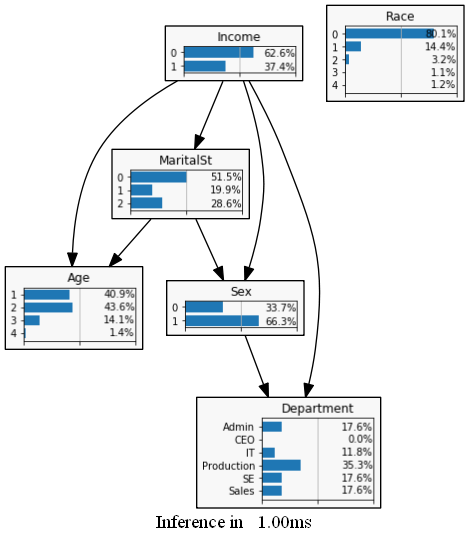

In [49]:
#gnb.showInference(bn_tot_race, size='24')

In [50]:
bn_tot_race.cpt('Sex')

(gum::Potential<double>@000000000CBDA7C0) <Sex:0|MaritalSt:0|Income:0> :: 0.171524 /<Sex:1|MaritalSt:0|Income:0> :: 0.828476 /<Sex:0|MaritalSt:1|Income:0> :: 0.676876 /<Sex:1|MaritalSt:1|Income:0> :: 0.323124 /<Sex:0|MaritalSt:2|Income:0> :: 0.489124 /<Sex:1|MaritalSt:2|Income:0> :: 0.510876 /<Sex:0|MaritalSt:0|Income:1> :: 0.132371 /<Sex:1|MaritalSt:0|Income:1> :: 0.867629 /<Sex:0|MaritalSt:1|Income:1> :: 0.373087 /<Sex:1|MaritalSt:1|Income:1> :: 0.626913 /<Sex:0|MaritalSt:2|Income:1> :: 0.37574 /<Sex:1|MaritalSt:2|Income:1> :: 0.62426

In [51]:
list_dd = ['IT', 'Admin', 'Production', 'SE', 'Sales']
list_se = ['0', '1']
list_inc = ['0', '1']
#list_sug = [ ]
#list2 = [ ]
for dd in list_dd:
    for inc in list_inc:
        for se in list_se:
            pro = df_new_race[(df_new_race.Department.isin([dd])) & (df_new_race.Sex.isin([se]))  &(df_new_race.Income.isin([inc])) ].shape[0] /(1.0*df_new_race[df_new_race.Department.isin([dd])&(df_new_race.Income.isin([inc]))].shape[0])
            print dd,inc, se, pro 
        

IT 0 0 0.46013667426
IT 0 1 0.53986332574
IT 1 0 0.185022026432
IT 1 1 0.814977973568
Admin 0 0 0.699875466999
Admin 0 1 0.300124533001
Admin 1 0 0.406091370558
Admin 1 1 0.593908629442
Production 0 0 0.278236914601
Production 0 1 0.721763085399
Production 1 0 0.0711678832117
Production 1 1 0.928832116788
SE 0 0 0.501672240803
SE 0 1 0.498327759197
SE 1 0 0.22967189729
SE 1 1 0.77032810271
Sales 0 0 0.397111913357
Sales 0 1 0.602888086643
Sales 1 0 0.112107623318
Sales 1 1 0.887892376682


In [52]:
list_ss = ['0', '1']
list_pay = ['0', '1']
for ss in list_ss:
    for pay in list_pay:
        print ss, pay, df_new_race[(df_new_race.Sex.isin([ss]))  &(df_new_race.Income.isin([pay])) ].shape[0] /(1.0*df_new_race[(df_new_race.Income.isin([pay]))].shape[0])

0 0 0.433605864111
0 1 0.175943396226
1 0 0.566394135889
1 1 0.824056603774


In [53]:
bn_tot_race.cpt('MaritalSt')

(gum::Potential<double>@000000000CB37A00) <MaritalSt:0|Income:0> :: 0.332112 /<MaritalSt:1|Income:0> :: 0.26615 /<MaritalSt:2|Income:0> :: 0.401738 /<MaritalSt:0|Income:1> :: 0.819697 /<MaritalSt:1|Income:1> :: 0.0873222 /<MaritalSt:2|Income:1> :: 0.0929812

In [54]:
print 'Age: from 16 to 99, automatically divided into 4 age groups'
print 'Income: above and below average (0,1 respectively)'
print 'Marital St (Marital Status): Married (0), Not Married (divorced, separated widowed) (1), Single (2)'
bn_tot_race.cpt('Age')

Age: from 16 to 99, automatically divided into 4 age groups
Income: above and below average (0,1 respectively)
Marital St (Marital Status): Married (0), Not Married (divorced, separated widowed) (1), Single (2)


(gum::Potential<double>@000000000CBDA540) <Age:1|MaritalSt:0|Income:0> :: 0.371799 /<Age:2|MaritalSt:0|Income:0> :: 0.447341 /<Age:3|MaritalSt:0|Income:0> :: 0.157908 /<Age:4|MaritalSt:0|Income:0> :: 0.0229523 /<Age:1|MaritalSt:1|Income:0> :: 0.283892 /<Age:2|MaritalSt:1|Income:0> :: 0.492542 /<Age:3|MaritalSt:1|Income:0> :: 0.197043 /<Age:4|MaritalSt:1|Income:0> :: 0.0265225 /<Age:1|MaritalSt:2|Income:0> :: 0.797831 /<Age:2|MaritalSt:2|Income:0> :: 0.160712 /<Age:3|MaritalSt:2|Income:0> :: 0.0358145 /<Age:4|MaritalSt:2|Income:0> :: 0.00564261 /<Age:1|MaritalSt:0|Income:1> :: 0.204837 /<Age:2|MaritalSt:0|Income:1> :: 0.604684 /<Age:3|MaritalSt:0|Income:1> :: 0.181249 /<Age:4|MaritalSt:0|Income:1> :: 0.00922907 /<Age:1|MaritalSt:1|Income:1> :: 0.140639 /<Age:2|MaritalSt:1|Income:1> :: 0.621287 /<Age:3|MaritalSt:1|Income:1> :: 0.216247 /<Age:4|MaritalSt:1|Income:1> :: 0.0218272 /<Age:1|MaritalSt:2|Income:1> :: 0.46175 /<Age:2|MaritalSt:2|Income:1> :: 0.421175 /<Age:3|MaritalSt:2|Income:1> :: 0.111792 /<Age:4|MaritalSt:2|Income:1> :: 0.00528318

In [55]:
#percentage for each age
list_age = ['1', '2', '3', '4']
for age in list_age:
     print age, df_new_race[(df_new_race.Age.isin([age]))].shape[0] /(1.0*df_new_race.Department.shape[0])


1 0.408681842245
2 0.435856714311
3 0.141168166578
4 0.0142932768661


In [56]:
list_rate = ['0','1']
list_mst = ['0','1', '2']
for mst in list_mst:
    for rate in list_rate:
        print mst, rate, df_new_race[(df_new_race.MaritalSt.isin([mst]))  &(df_new_race.Income.isin([rate])) ].shape[0] /(1.0*df_new_race[(df_new_race.Income.isin([rate]))].shape[0])

0 0 0.332111643643
0 1 0.819811320755
1 0 0.266140400338
1 1 0.0872641509434
2 0 0.401747956019
2 1 0.0929245283019


In [57]:
#Suggestion list who to hire first men or women to the CEO department
list_gen_ceo = ['0', '1']
list_sug_ceo = [ ]

for gen_ceo in list_gen_ceo:  
    x_ceo = dfadult[(dfadult.Department.isin(['CEO'])) & (dfadult.Sex.isin([gen_ceo]))].shape[0] /(1.0*dfadult[dfadult.Department.isin(['CEO'])].shape[0])
    list_sug_ceo.append([gen_ceo, x_ceo])
print 'Female: 0, Male: 1'       
df_suggest_gen_ceo = pandas.DataFrame(list_sug_ceo, columns=['Sex', 'Percentage'])
print  df_suggest_gen_ceo.sort_values(by=['Percentage'], ascending=False).to_string(columns=['Sex'], index=False)
print '_____________________'

Female: 0, Male: 1
Sex
 1
 0
_____________________


In [58]:
##Suggestion list who to hire first white or non-white to the CEO department
list_r_ceo = ['0', '1', '2', '3', '4']
list_sug_rceo = [ ]

for r_ceo in list_r_ceo:  
    y_ceo = dfadult[(dfadult.Department.isin(['CEO'])) & (dfadult.Race.isin([r_ceo]))].shape[0] /(1.0*dfadult[dfadult.Department.isin(['CEO'])].shape[0])
    list_sug_rceo.append([r_ceo, y_ceo])
print 'White:0 , Black:1, Asian-Pac-Islander:2, Amer-Indian-Eskimo:3, Other:4'    
df_suggest_r_ceo = pandas.DataFrame(list_sug_rceo, columns=['Race', 'Percentage'])
print  df_suggest_r_ceo.sort_values(by=['Percentage'], ascending=False).to_string(columns=['Race'], index=False)
print '_____________________'

White:0 , Black:1, Asian-Pac-Islander:2, Amer-Indian-Eskimo:3, Other:4
Race
  0
  1
  2
  3
  4
_____________________
